<a href="https://colab.research.google.com/github/2kunal6/UniBonn/blob/master/cuda_lab/2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified




  0%|          | 0/1407 [00:00<?, ?it/s]

  1%|          | 14/1407 [00:00<00:09, 139.62it/s]

datasets loaded
Running on the GPU




  2%|▏         | 27/1407 [00:00<00:10, 134.61it/s]

  3%|▎         | 41/1407 [00:00<00:10, 133.61it/s]

  4%|▍         | 55/1407 [00:00<00:10, 134.10it/s]

  5%|▍         | 69/1407 [00:00<00:09, 134.53it/s]

  6%|▌         | 83/1407 [00:00<00:09, 133.98it/s]

  7%|▋         | 98/1407 [00:00<00:09, 136.89it/s]

  8%|▊         | 111/1407 [00:01<00:33, 38.24it/s]

  9%|▉         | 125/1407 [00:01<00:26, 48.88it/s]

 10%|▉         | 140/1407 [00:01<00:20, 60.94it/s]

 11%|█         | 154/1407 [00:01<00:17, 73.34it/s]

 12%|█▏        | 167/1407 [00:02<00:14, 83.88it/s]

 13%|█▎        | 181/1407 [00:02<00:13, 94.09it/s]

 14%|█▍        | 196/1407 [00:02<00:11, 104.72it/s]

 15%|█▍        | 210/1407 [00:03<00:31, 38.05it/s] 

 16%|█▌        | 223/1407 [00:03<00:24, 48.03it/s]

 17%|█▋        | 237/1407 [00:03<00:19, 59.40it/s]

 18%|█▊        | 251/1407 [00:03<00:16, 71.29it/s]

 19%|█▉        | 265/1407 [00:03<00:13, 83.50it/s]

 20%|█▉        | 280/1407 [00:03<00:11, 95.63it/s]

 21%|██ 

epoch: 0, loss: 1.611220121383667




  2%|▏         | 27/1407 [00:00<00:10, 135.55it/s]

  3%|▎         | 41/1407 [00:00<00:10, 134.37it/s]

  4%|▍         | 56/1407 [00:00<00:09, 137.34it/s]

  5%|▍         | 70/1407 [00:00<00:09, 136.39it/s]

  6%|▌         | 85/1407 [00:00<00:09, 138.77it/s]

  7%|▋         | 98/1407 [00:01<00:33, 38.53it/s] 

  8%|▊         | 113/1407 [00:01<00:26, 49.46it/s]

  9%|▉         | 129/1407 [00:01<00:20, 62.04it/s]

 10%|█         | 145/1407 [00:01<00:16, 75.43it/s]

 11%|█▏        | 160/1407 [00:01<00:14, 88.55it/s]

 12%|█▏        | 175/1407 [00:02<00:12, 99.90it/s]

 14%|█▎        | 190/1407 [00:02<00:10, 110.68it/s]

 15%|█▍        | 205/1407 [00:03<00:29, 40.46it/s] 

 16%|█▌        | 219/1407 [00:03<00:23, 51.42it/s]

 17%|█▋        | 233/1407 [00:03<00:18, 63.11it/s]

 17%|█▋        | 246/1407 [00:03<00:15, 74.55it/s]

 18%|█▊        | 259/1407 [00:03<00:13, 84.58it/s]

 19%|█▉        | 273/1407 [00:03<00:11, 95.87it/s]

 20%|██        | 288/1407 [00:03<00:10, 106.40it/s]

 21%|██

epoch: 1, loss: 1.9225568771362305


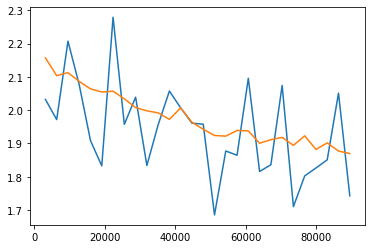

[[421  25  50  59  54  14  68  78 154  77]
 [ 64 286   8  34  29  22  72  46 132 307]
 [238  17 171 117  68  77 137  76  65  34]
 [ 98  20  59 256  55 169 119  71  74  79]
 [186  16 108 108 211  75 105  79  77  35]
 [ 96   5  71 185  45 290  99  76  89  44]
 [100  19  54 159  64 108 321  43  58  74]
 [112  19  66  84  80  64  65 366  72  72]
 [158  65   9  41  26  27  29  40 466 139]
 [ 61  88  10  42  23  16  48  74 108 530]]
Accuracy of the network on the 10000 test images: 33.18
318.1268005371094
0.6839199662208557
48.2912483215332
1.159182071685791


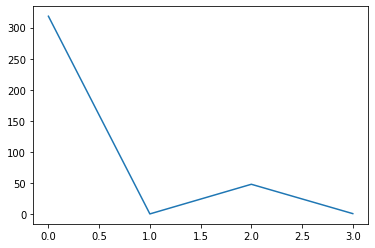

In [90]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

np.random.seed(1)

transform_list = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()
            #transforms.Normalize([0.5,],[0.5,])
        ])
train = datasets.CIFAR10("./", train=True, transform=transform_list, download=True)

test = torch.utils.data.DataLoader(
    datasets.CIFAR10("./", train=False, transform=transform_list, download=True), batch_size = 32, shuffle = True
)

print("datasets loaded")

IMG_SIZE = 32*32

'''for data in train:
  X, y = data[0][0], data[1][0]
  plt.imshow(X.view(32, 32))
  print("Label: " + str(y))
  plt.show()
  break'''

class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(input_dim, 300)
    self.linear2 = nn.Linear(300, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.relu(self.linear1(x))
    out = self.linear2(out)
    return out

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = LogisticRegression(IMG_SIZE, 10).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss().to(device)

def test_perform(test_data):
  total = 0
  correct = 0

  y_true = []
  y_pred = []

  loss = 0.0
  i=0
  with torch.no_grad():
    for data in test_data:
      X, y = data[0].to(device), data[1].to(device)

      output = model(X.view(-1, IMG_SIZE))
      _, predicted = torch.max(output, 1)

      loss += criterion(output, y)

      total += y.size(0)
      correct += (predicted == y).sum().item()

      y_pred.extend(predicted.tolist())
      y_true.extend(y.tolist())

      i+=1

    accuracy = 100 * correct / total
    return accuracy, y_true, y_pred, loss/i

BATCH_SIZE = 32

loss_train = []
loss_val = []
iter_list = []
iter_num = 0

for epoch in range(2):
  train_size = int(0.9 * len(train))
  val_size = len(train) - train_size
  train_dataset, val_dataset = torch.utils.data.random_split(train, [train_size, val_size])
  train_loader = torch.utils.data.DataLoader(train_dataset,batch_size = BATCH_SIZE, shuffle = True)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True)

  for data in tqdm(train_loader):
    X, y = data[0].to(device), data[1].to(device)
    
    optimizer.zero_grad()
    
    output = model(X.view(-1, IMG_SIZE))
    
    loss = criterion(output, y)
    
    loss.backward()
    
    optimizer.step()
    
    iter_num+=BATCH_SIZE

    if(iter_num%(BATCH_SIZE*100) == 0):
      _, _, _, val_loss = test_perform(val_loader)

      iter_list.append(iter_num)
      loss_train.append(loss)
      loss_val.append(val_loss)

    
  print(f'epoch: {epoch}, loss: {loss}')

plt.plot(iter_list, loss_train)
plt.plot(iter_list, loss_val)
plt.show()

    
accuracy, y_true, y_pred, _ = test_perform(test)

print(confusion_matrix(y_true, y_pred))
print(f'Accuracy of the network on the 10000 test images: {accuracy}')

norm_list = []
for x in model.parameters():
  print(x.grad.cpu().norm(1).tolist())
  norm_list.append(x.grad.cpu().norm(1).tolist())

plt.plot(norm_list)
plt.show()